<img src='bit_hd.jpg'/>

## <span style="color:blue"> DEFINITION </span>: Logistic Classification  of patient will suffer from HeartDieases or not.

## <span style="color:blue">Prepared By</span>:     PRATIK VASAVA

# Logistic Regression:


It is a technique to analyse a data-set which has a dependent variable and one or more independent variables to predict the outcome in a binary variable, meaning it will have only two outcomes.

The dependent variable is categorical in nature. Dependent variable is also referred as target variable and the independent variables are called the predictors.

Logistic regression is a special case of linear regression where we only predict the outcome in a categorical variable. It predicts the probability of the event using the log function.

We use the Sigmoid function/curve to predict the categorical value. The threshold value decides the outcome(win/lose).

Linear regression equation:    y = β0 + β1X1 + β2X2 …. + βnXn

Y stands for the dependent variable that needs to be predicted.

β0 is the Y-intercept, which is basically the point on the line which touches the y-axis.
β1 is the slope of the line (the slope can be negative or positive depending on the relationship between the dependent 

variable and the independent variable.)

X here represents the independent variable that is used to predict our resultant dependent value.
Sigmoid function:    p = 1 / 1 + e-y

Apply sigmoid function on the linear regression equation.

<img src='logistic.png'/>

Logistic Regression equation:  p = 1 / 1 + e-(β0 + β1X1 + β2X2 …. + βnXn)



# Prerequisites Python libraries

### Pandas(https://pandas.pydata.org/getpandas.html) =Library for data data manipulation and analysis.

### Matplolib(https://matplotlib.org/)=Library for to performe mathamtical oprations.

### numpy(http://www.numpy.org/)=Library  NumPy is a general-purpose array-processing package. 


# Import Libraries

In [249]:

#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

In [250]:
#CREATING VARIBLE FOR  FILE
file='heart_for_logostic.csv'

In [251]:
#reading file using pandas
data=pd.read_csv(file)

In [252]:
#view first five entry 
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [253]:
#checking total rows and columns.
data.shape

(303, 14)

## Data Feature Explanation.


            - Age                     patient age in years.
            - sex                     Gender(male,female).
            - cp                      chest pain type
            - trestbps                resting blood pressure (in mm Hg on admission to the hospital)
            - chol                    serum cholestoral in mg/dl
            - fbs                     (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
            - restecg                 resting electrocardiographic results
            - thalach                 maximum heart rate achieved 
            - exang                   exercise induced angina (1 = yes; 0 = no)
            - oldpeak                 ST depression induced by exercise relative to rest
            - slop                    the slope of the peak exercise ST segment
            - ca                      number of major vessels (0-3) colored by flourosopy
            - thal                    3 = normal; 6 = fixed defect; 7 = reversable defect
            

### DEPENDANT VARIABLE:




           -TARGET: Will patient will be affected by heart deasease or not? 



# Exploratory Data Analysis(EDA).

exploratory data analysis (EDA) is an approach in statastics to analyzing data sets to summarize their main characteristics, 

often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us 

beyond the formal modeling or hypothesis testing task.

In [254]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Lets explore data to find Basic statastical information. 

     count:         total count of entry,
     mean           mean of all data.
     Std:           standars daviation of variable, 
     min:           minimum value 
     max:           Maximum value.
     data spread at different Inter Quantail range(IQR):Like 25%,50%,75%.

NOTE:ONLY apply on continuos variable    

In [255]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


  observation: 1) Only 1 varible float(64) and remaning 13 VARIBLE ARE INTIGER TYPE.
               2) There is no 'NULL' value present in any variable.


- DATASET CONATINING 303 ENTERIES AND 14 FEATURES.

In [256]:
#converting into intege data type
#data['oldpeck']=data['oldpeak'].astype(int)
#data['oldpeak']

### Missing Values

In [257]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

NOTE:THERE IS NO NULL VALUE IN DATASET

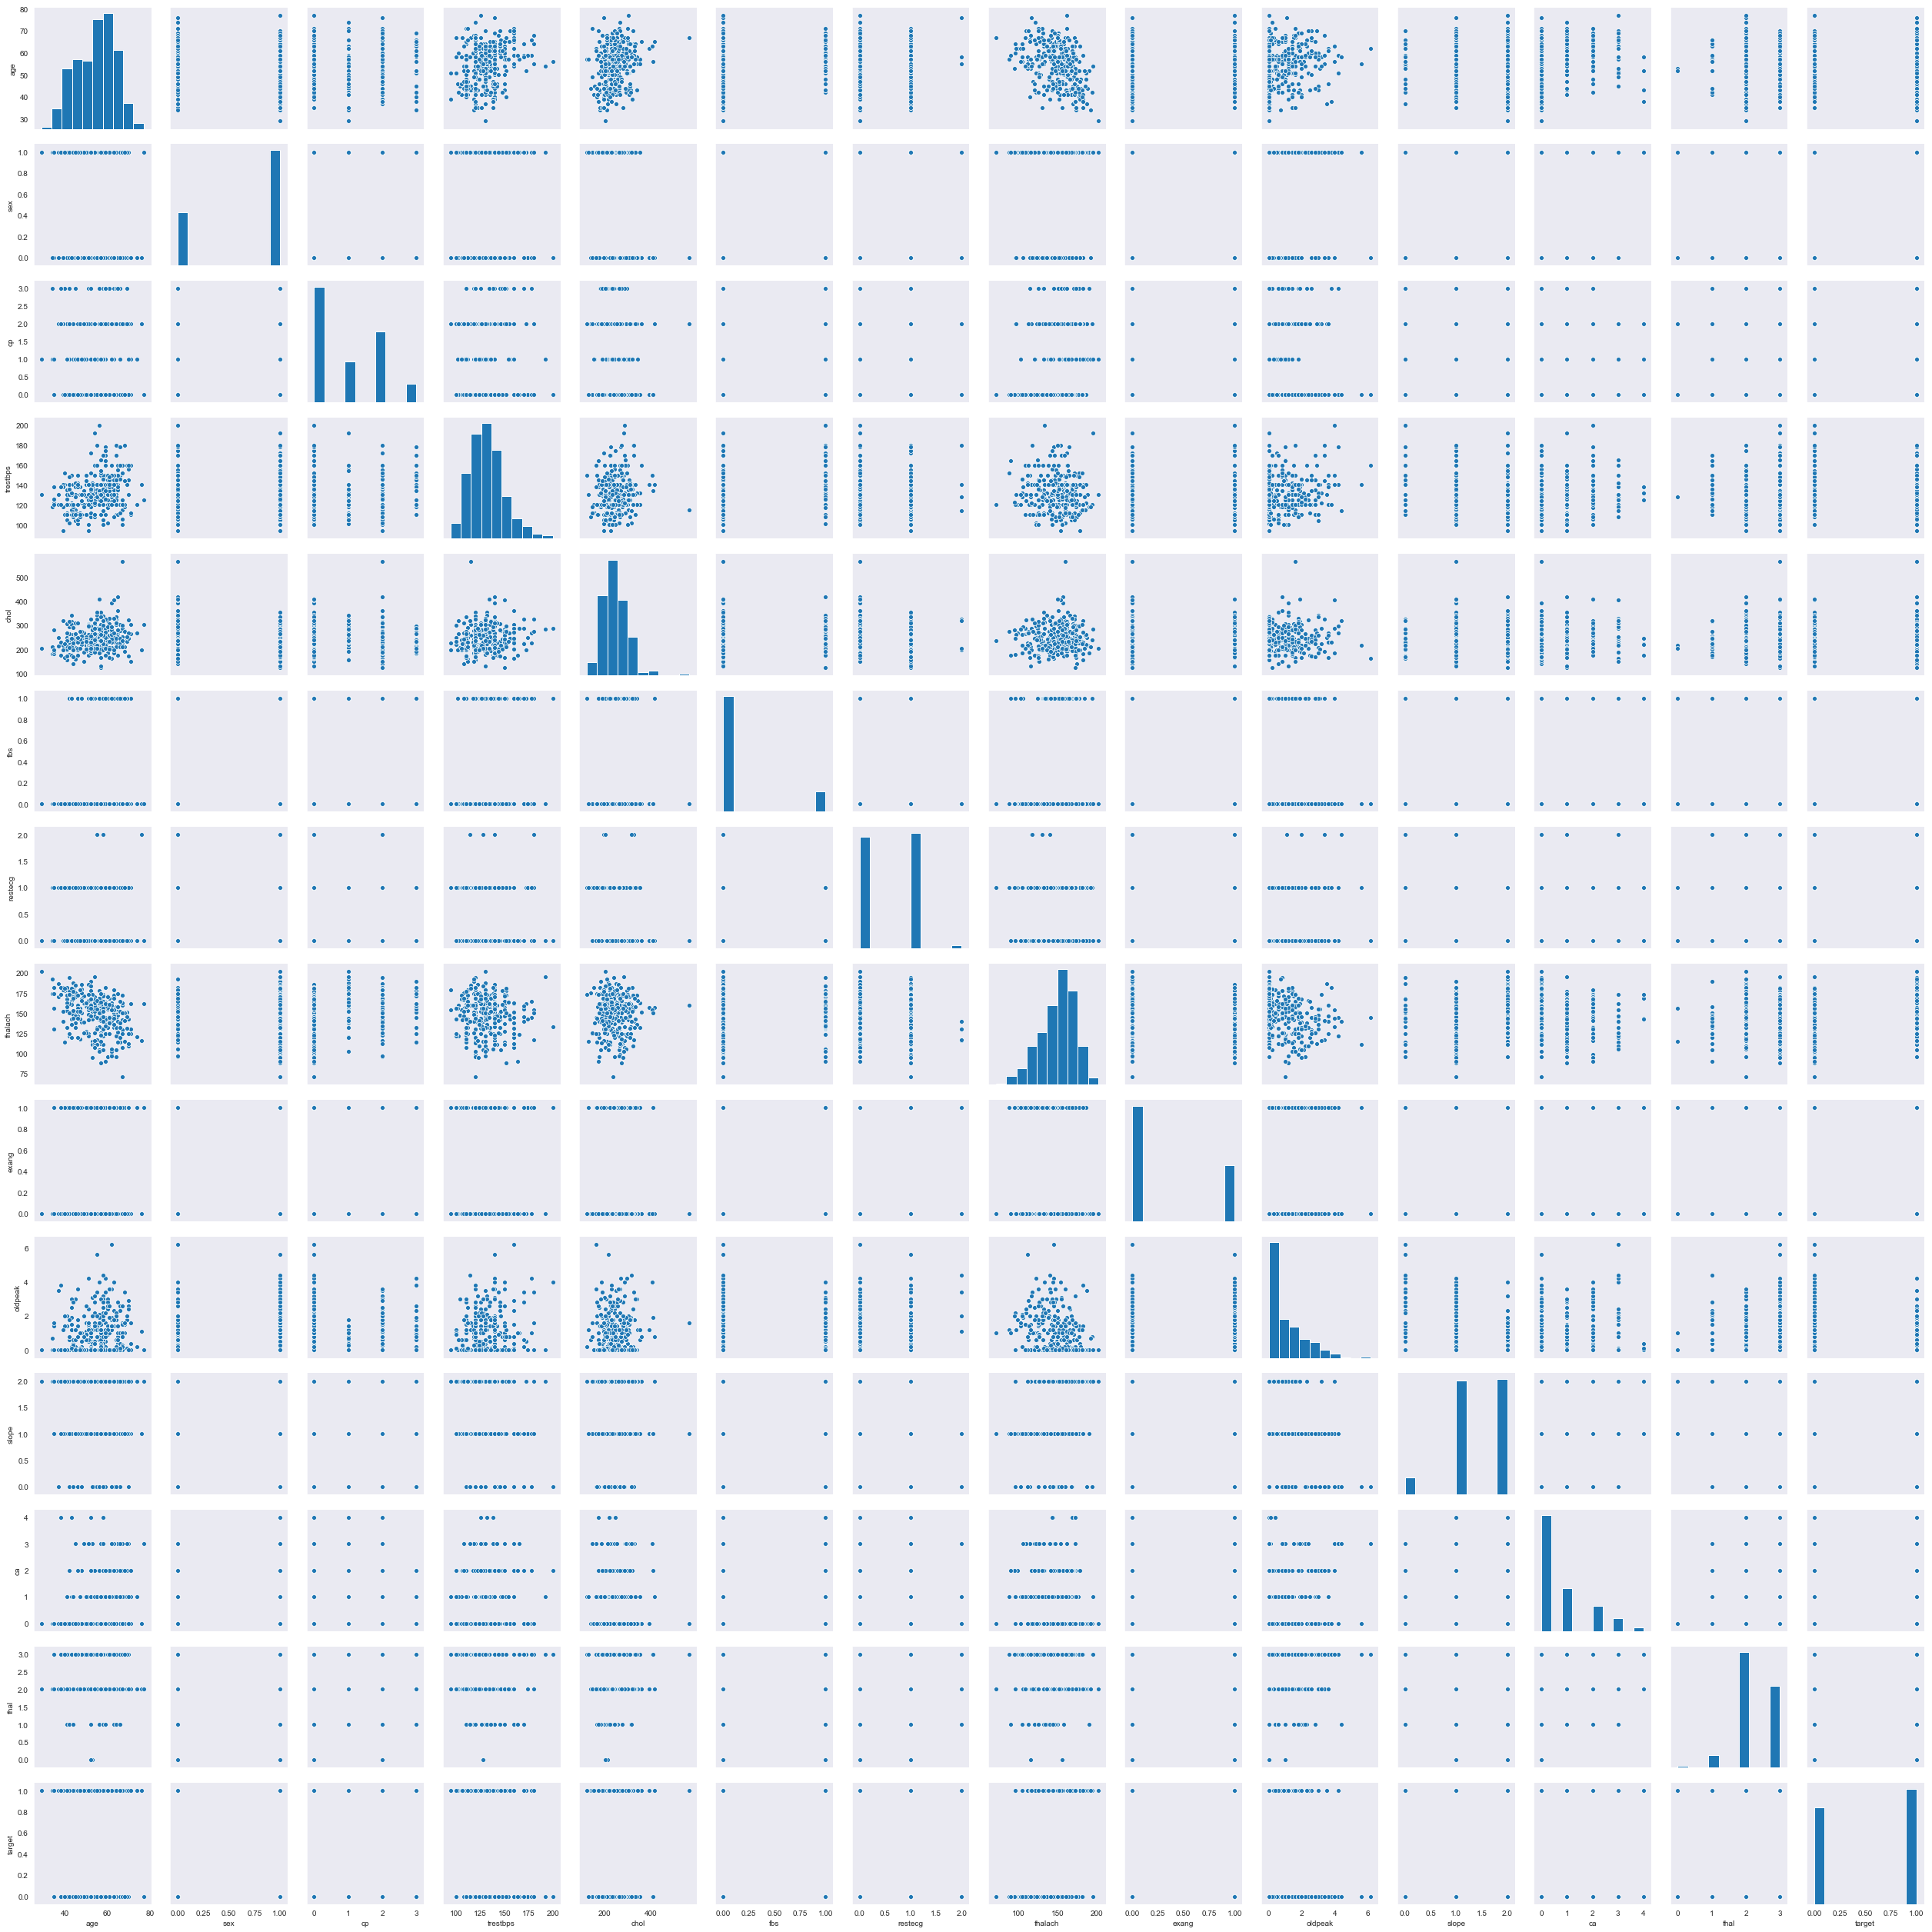

In [258]:
#Generate pairplot for check correlation.
sns.pairplot(data)

## FINDING NUMERICAL VARIABLE FROM DATASET

In [259]:
numerical_data=[feature for feature in data.columns if len(data[feature].unique())>25]
numerical_data


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [260]:
descrete_data=[feature for feature in numerical_data if len(data[feature].unique())<6]
descrete_data

[]

### important:

#### Dataset has no descrete variable

## EXPLORING CONTINUOUS  VARIBLE

In [261]:
#finding continuos variables
continuous_data=[feature for feature in numerical_data if len(data[feature].unique())>25]
continuous_data

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

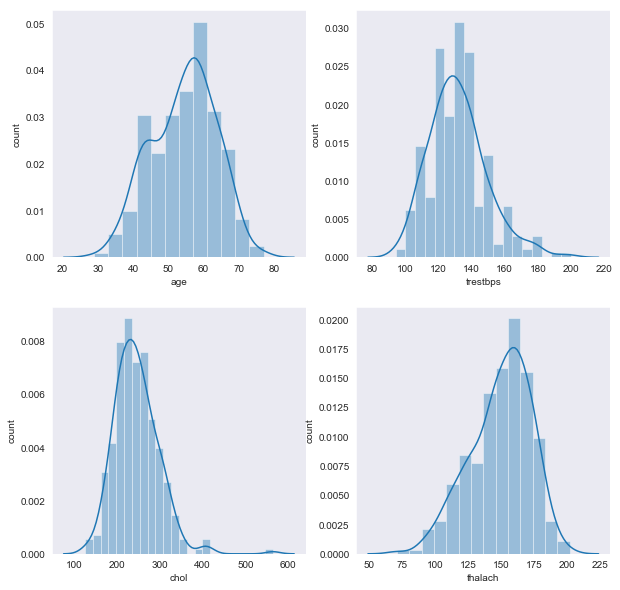

In [262]:
#crating histogram to check frequency distrubation.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['age'])
plt.xlabel('age')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,2)
sns.distplot(data['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,3)
sns.distplot(data['chol'])
plt.xlabel('chol')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,4)
sns.distplot(data['thalach'])
plt.xlabel('thalach')
plt.ylabel('count')
#plt.title()
plt.show()

### observation:
#### 1)variable 'age', 'trestbps', 'thalach' almost looking good, following normal distribution.very little skewed
#### 2)but other variables having more Skewedness need to normalized.

# Outliers

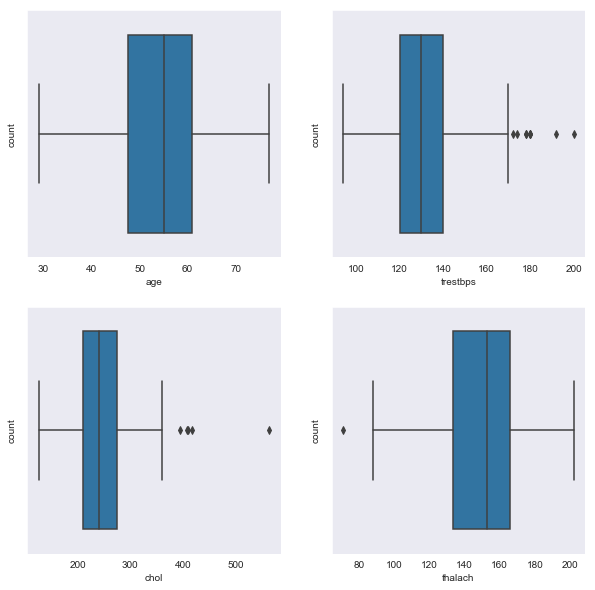

In [263]:
#plotting barbox to check outliers.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['age'])
plt.xlabel('age')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,2)
sns.boxplot(data['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,3)
sns.boxplot(data['chol'])
plt.xlabel('chol')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,4)
sns.boxplot(data['thalach'])
plt.xlabel('thalach')
plt.ylabel('count')
#plt.title()
plt.show()




In [264]:
#
Q1 = data.quantile(0.25)
Q3 =data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [265]:
#step 3)removing data which are far from quarter 1 (lower limit) and quarter 3 (upper limit)
 data=data[~((data< (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape


IndentationError: unexpected indent (<ipython-input-265-4f3c8729ef1e>, line 2)

In [ ]:
 #step 2)dispaly data id oulier or not.if not then labeled as 'False' else 'True'
(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))



In [ ]:
#plotting boxplot after removing outlier.
plt.figure(figsize=(10,10))
col='orange'
plt.subplot(2,2,1)
sns.boxplot(data['age'],color=col)
plt.xlabel('age')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,2)
sns.boxplot(data['trestbps'],color=col)
plt.xlabel('trestbps')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,3)
sns.boxplot(data['chol'],color=col)
plt.xlabel('chol')
plt.ylabel('count')
#plt.title()
plt.subplot(2,2,4)
sns.boxplot(data['thalach'],color=col)
plt.xlabel('thalach')
plt.ylabel('count')
#plt.title()
plt.show()


In [ ]:
#data=data.drop(columns='oldpeak',axis=1)
data.head()

## CATEGORICAL VARIABLE

In [ ]:
categorical_data=[feature for feature in data.columns if len(data[feature].unique())<25]
categorical_data


In [ ]:
#plotting graph wit respect to target variable and and categorical data
col=data[categorical_data].columns
fig=plt.figure(figsize=(22,18))
plt.title('HISTOGRAM OF CATEGORICAL DATA WITH RESPECT TO TARGET ',fontsize=20)
i=0
x=len(data[categorical_data].columns)
#print(x)
for i in range(x-1):
    #print(i)
    i=i
    #b=int(x+1)
    #print(b)
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(3,3,i+1)
    #sns.distplot(data[z])
    #sns.countplot(x=data[z],data=dataset)
    data.groupby(data[z])['target'].count().plot.bar()
    #data[data[z]].value_counts().plot(kind='bar')
    plt.xlabel(z,fontsize=16,color='red')
    plt.ylabel('TARGET',fontsize=16,color='blue')
    

plt.show()
    

In [ ]:
data.corr()

In [ ]:
corrmat=data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,10))

g=sns.heatmap(data[top_corr_feature].corr(),annot=True,annot_kws={'size':16},cmap='coolwarm')

In [ ]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1:]


# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

In [ ]:
print(model.feature_importances_)

In [ ]:
plt.figure(figsize=(8,8))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
color=['green','blue','yellow','orange','red']
feat_importances.nlargest(10).plot(kind='barh',color=color)
plt.xlabel('Featness_Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# feature scalling

In [ ]:
#Indpandat and depandant variable set up
x=data[['oldpeak','age','cp','thal','ca']].values


y=data['target'].values

In [ ]:
#import libraray for model selection.
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data into tarinning and testing data.
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=.20,random_state=0)


In [ ]:
#importing library for logisitic regression 
from sklearn.linear_model import LogisticRegression

In [ ]:
#create classifier
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(x_test)
y_pred

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)

cnf_matrix

In [ ]:

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate

In [ ]:

plt.figure(figsize=(9,8))
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:

print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test,y_pred))